In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# filtering the data for Data Analyst Jobs in US
#Not using india data becasue it ahs around 6000 rows and if we drop the na values then we only have around 60 or 100 values. so insufficient data
df_us_da = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States") ].dropna(subset= "salary_year_avg").copy()

In [3]:
df_da_exploded = df_us_da.explode("job_skills")

In [13]:
df_count =df_da_exploded.groupby("job_skills")["salary_year_avg"].size().reset_index(name = "count").sort_values(by="count", ascending=False)

In [14]:
df_median = df_da_exploded.groupby("job_skills")["salary_year_avg"].median().reset_index(name = "median").sort_values(by="median", ascending=False)

In [19]:
df_merged =pd.merge(df_count , df_median , on = "job_skills", how = "inner")
df_merged

,job_skills,count,median
0,sql,2508,91000.0
1,excel,1808,84392.0
2,python,1431,97500.0
3,tableau,1364,92875.0
4,sas,926,90000.0
...,...,...,...
165,couchbase,1,160515.0
166,chainer,1,100000.0
167,chef,1,85000.0
168,cordova,1,113269.5


In [32]:
df_count_final = df_merged.sort_values(by="count" , ascending= False).head(10)
df_median_final = df_merged.sort_values(by="median" , ascending= False).head(10)

df_count_final


,job_skills,count,median
0,sql,2508,91000.00
1,excel,1808,84392.00
2,python,1431,97500.00
3,tableau,1364,92875.00
4,sas,926,90000.00
5,r,893,92500.00
6,power bi,838,90000.00
7,powerpoint,462,85000.00
8,word,461,81194.75
9,sql server,286,92500.00


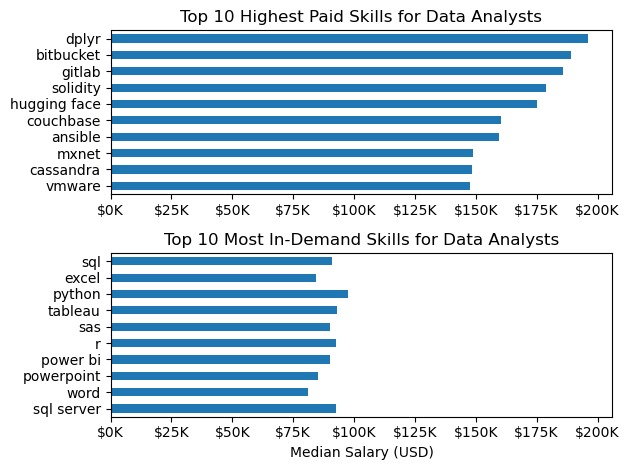

In [48]:
fig,ax = plt.subplots(2,1)

df_median_final.plot(kind = "barh", x= "job_skills" , y="median" , ax=ax[0], legend =False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_count_final.plot(kind ="barh" , x= "job_skills" , y="median", ax=ax[1] , legend = False )
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


fig.tight_layout()